# Quantitative exploratory data analysis

## Introduction to summary statistics: The sample mean and median

### Computing means


In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
data = load_iris()
versicolor_petal_length = data.data[data.target == 1][:,2]

In [6]:

mean_length_vers = np.mean(versicolor_petal_length)
print("I. versicolor", mean_length_vers, "cm")

I. versicolor 4.26 cm


## Percentiles, outliers, and box plots

Median is a special name for the 50th percentile.

### Computing percentiles

In [20]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

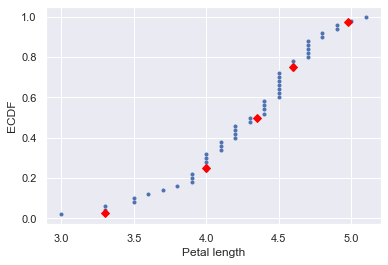

In [26]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
import seaborn as sns
sns.set()
x_vers, y_vers = ecdf(versicolor_petal_length)
plt.plot(x_vers, y_vers, marker=".", linestyle="none")
plt.xlabel("Petal length")
plt.ylabel("ECDF")
plt.plot(ptiles_vers, percentiles/100, marker="D", color="red", linestyle="none")
plt.show()




### Box-and-whisker plot

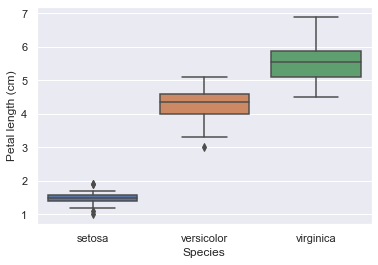

In [27]:
import pandas as pd
names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
df = pd.DataFrame(data.data, columns=names)
data.target_names
names = data.target[:]
l = []
for i in names:
    l.append(data.target_names[i])
namesdf = pd.DataFrame(l, columns=["species"])
df = df.join(namesdf)

sns.boxplot(x="species", y="petal length (cm)", data=df)
plt.xlabel("Species")
plt.ylabel("Petal length (cm)")
plt.show()

## Variance and standard deviation

The spread is quantified with variance. The variance is the squared distance from the mean. The square root of the variance is called standart deviation.
STD is a reasonable metric for the spread of the data.

### Computing the variance

In [47]:
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
diff_sq = differences ** 2
variance_explicit = np.mean(diff_sq)
variance_np = np.var(versicolor_petal_length)
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


### The standard deviation and the variance

In [48]:
variance = np.var(versicolor_petal_length)
print(np.sqrt(variance))
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## Covariance and the Pearson correlation coefficient

Covariance is the mean of product of differences.
Dividing covariance by the std -> Pearson's correlation coefficient. Pearson's correlation coefficient shows that how two variables depend on eachother. 

### Scatter plots

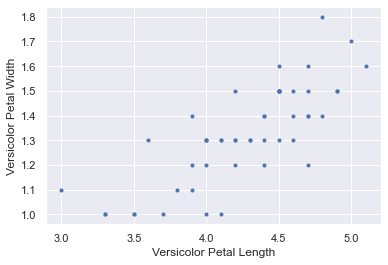

In [51]:
versicolor_petal_width = df[df["species"] == "versicolor"]["petal width (cm)"]
plt.plot(versicolor_petal_length, versicolor_petal_width, marker=".",linestyle="none")
plt.xlabel("Versicolor Petal Length")
plt.ylabel("Versicolor Petal Width")
plt.show()

### Variance and covariance by looking

### Computing the covariance

In [54]:
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print(covariance_matrix)
petal_cov = covariance_matrix[0,1]
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient

In [55]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print(r)

0.7866680885228169
